In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import planarity_criterion as pc 
import printers as printers

planarity_crit = pc.PlanarityCriterion()
solver_CNF = pc.CNF2Solver()
printer = printers.Printer()

Seed:  4218


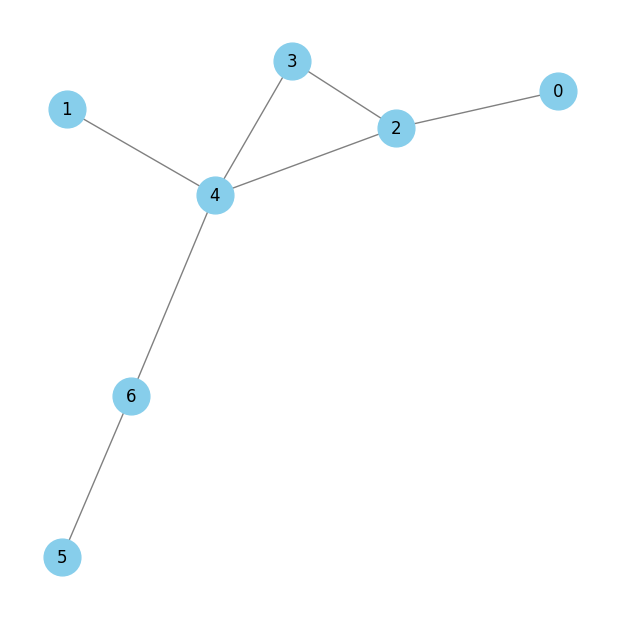

In [2]:
### CREATE A RANDOM GRAPH G ###


# Generate a random seed first
seed_value = random.randint(0, 10000)  # Random seed between 0 and 10000
random.seed(seed_value)
print("Seed: ", seed_value)

# Parameters
n = 7 # Number of nodes
p = 0.35 # Probability of edge creation

# Generate a random connected Erdős-Rényi graph
G = nx.erdos_renyi_graph(n, p)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p)

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

In [3]:
### CREATE SPANNING TREE ###
spanning_tree = planarity_crit.spanning_tree(G)
print(spanning_tree.edges)

[(0, 2), (2, 3), (3, 4), (4, 1), (4, 6), (6, 5)]


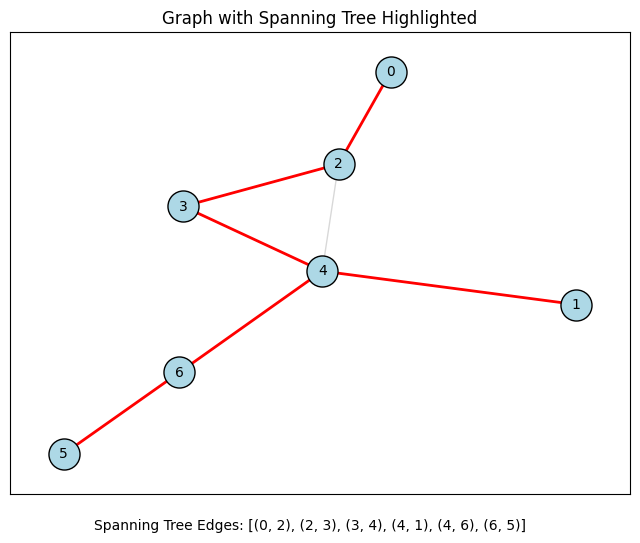

In [4]:
### PRINT SPANNING TREE ### 
printer.print_spanning_tree(G, spanning_tree)

In [5]:
### GENERATE SET OF FUNDAMENTAL CYCLES ### 

fundamental_cycles = planarity_crit.fundamental_cycles(G, spanning_tree)
print(fundamental_cycles)

[[2, 3, 4, 2]]


In [6]:
### GET BRIDGES OF EACH CYCLE ###

bridges_all_cycles = planarity_crit.get_bridges(G, fundamental_cycles)
print(bridges_all_cycles)

{(2, 3, 4, 2): [{'edges': [(0, 2)], 'att_ver': {2}}, {'edges': [(1, 4)], 'att_ver': {4}}, {'edges': [(4, 6), (6, 5)], 'att_ver': {4}}]}


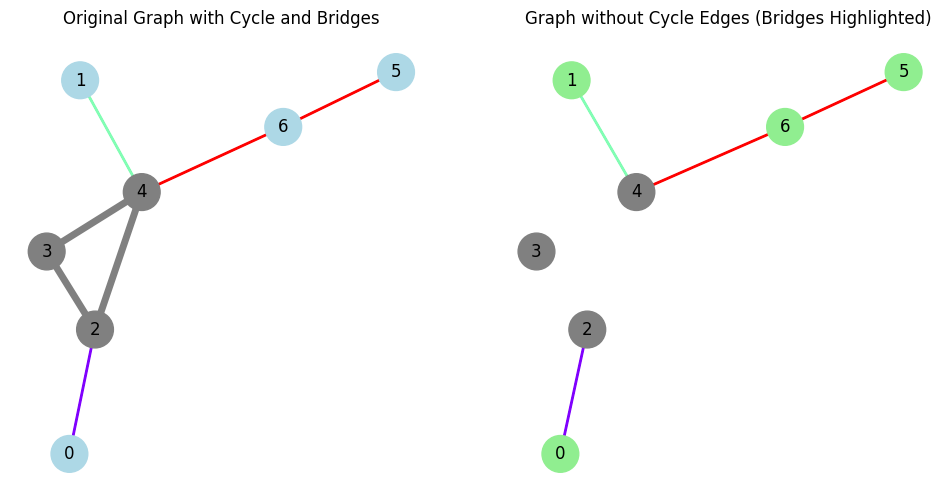

In [7]:
### PRINT BRIDGES OF EACH CYCLE ### TODO

printer.print_bridges(G, bridges_all_cycles)

In [8]:
### GET CNF LISTS ###

CNF_lists = planarity_crit.get_2_CNF(G, fundamental_cycles, bridges_all_cycles)

In [9]:
### PRINT CNF LISTS ### 

edge_index_map = {}
for i, edge in enumerate(G.edges()):
    edge_index_map[edge] = i
    # Store reversed edge as well
    edge_index_map[(edge[1], edge[0])] = i

printer.print_CNF_lists(CNF_lists, fundamental_cycles, edge_index_map)


LIST OF IMPLICATION BETWEEN VARIABLES OF THE FORM ((edge_node, edge_node), cycle)

Cycle 0 (Nodes: [2, 3, 4, 2]):
  Edge 5: (4, 6)
    PP_c,e (Positive-Positive): {((6, 5), 0)}
    PN_c,e (Positive-Negative): set()
    NP_c,e (Negative-Positive): set()
    NN_c,e (Negative-Negative): {((6, 5), 0)}
  Edge 6: (5, 6)
    PP_c,e (Positive-Positive): {((4, 6), 0)}
    PN_c,e (Positive-Negative): set()
    NP_c,e (Negative-Positive): set()
    NN_c,e (Negative-Negative): {((4, 6), 0)}
--------------------------------------------------


In [10]:
### COMPLETE CNF LISTS ### TODO

edge_index_map = {}
for i, edge in enumerate(G.edges()):
    edge_index_map[edge] = i
    # Store reversed edge as well
    edge_index_map[(edge[1], edge[0])] = i

cycle_index_map = {}
for i, c in enumerate(fundamental_cycles):
    cycle_index_map[tuple(c)] = i

CNF_lists = solver_CNF.update_CNF_iterative(
    CNF_lists, G, fundamental_cycles, edge_index_map, cycle_index_map
)

In [11]:
### PRINT CNF LISTS ### 

edge_index_map = {}
for i, edge in enumerate(G.edges()):
    edge_index_map[edge] = i
    # Store reversed edge as well
    edge_index_map[(edge[1], edge[0])] = i

printer.print_CNF_lists(CNF_lists, fundamental_cycles, edge_index_map)


LIST OF IMPLICATION BETWEEN VARIABLES OF THE FORM ((edge_node, edge_node), cycle)

Cycle 0 (Nodes: [2, 3, 4, 2]):
  Edge 5: (4, 6)
    PP_c,e (Positive-Positive): {((6, 5), 0), ((4, 6), 0)}
    PN_c,e (Positive-Negative): set()
    NP_c,e (Negative-Positive): set()
    NN_c,e (Negative-Negative): {((6, 5), 0)}
  Edge 6: (5, 6)
    PP_c,e (Positive-Positive): {((6, 5), 0), ((4, 6), 0)}
    PN_c,e (Positive-Negative): set()
    NP_c,e (Negative-Positive): set()
    NN_c,e (Negative-Negative): {((4, 6), 0)}
--------------------------------------------------


In [12]:
### GET PSEUDOEMBEDDING ###

In [13]:
### GET NEW PERIPHERAL CYCLE BASIS ###

In [14]:
### GET PLANE MESH AND CHECK PLANARITY ###